## **ML :** Customer Churn

#### _Customer Churn Dataset_

🟠 `on work`

---

1. **Preprocessing**
    * Extractions des variables
    * Proto-modélisation
    * Supression des valeurs aberrantes
    * Feature Selection
    * Feature Engineering
    * Feature Scaling
2. **Modeling**
    * Fonction d’évaluation
    * Entrainements multiples modèles
    * Optimisation
    * Analyse des erreurs
    * Courbe d'aprentissage
    * Décision

**Built-in**

In [372]:
import re

**Librairies**

In [373]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

**ML objects**

In [374]:
# Algorithms
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier 
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import plot_tree
# - -
# Evaluation, tuning, etc.
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold
from sklearn.model_selection import GridSearchCV
# - -
# Preprocessing
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import StandardScaler
# from sklearn.preprocessing import RobustScaler
# from sklearn.preprocessing import MinMaxScaler
# - -
# Metrics
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import ConfusionMatrixDisplay
# from sklearn.metrics import accuracy_score
# from sklearn.metrics import average_precision_score
# from sklearn.metrics import precision_score
# - - 
from sklearn.compose import make_column_transformer

**User Code**

In [375]:
# Reserved keywords for objects
df = pd.DataFrame
cm = confusion_matrix
cm_d = ConfusionMatrixDisplay
cr = classification_report
tf = make_column_transformer
tf_fit = None

In [376]:
def extract_x_y(dataframe:pd.DataFrame, target:str|list[str]) -> tuple :
    """Extract Features and Target from dataset

    Args:
        dataframe (pd.DataFrame): Dataframe to extract columns from
        target (str | list[str]): Target name

    Returns:
        tuple: Feature as X, and Label as y
    """

    y = dataframe[target] 
    X = dataframe.drop(columns=target)

    display(
        y.unique(),
        X.columns.to_list()
    )

    return X, y

In [377]:
def save_cm(cm:list, name:str) -> None :
    """Save a Confusion Matrix as CSV file in `./_outputs/` subdirectory

    Args:
        cm (list): Confusion Matrix built from `sklearn.metrics`
        name (str): A lowercase spaceless text for file name
    """
        
    df = pd.DataFrame({
        'Yes': [cm[0,0], cm[1,0]],
        'No': [cm[1,0], cm[1,1]]
    }, index=['True Yes', 'True No'])
    
    df.to_csv(f'./_outputs/cm_{name}.csv')

In [378]:
def encode_categorie(X:pd.DataFrame, feature:str) -> pd.DataFrame :
    """Encode one categorie (temp) with 'OneHotEncoder'

    Args:
        X (pd.DataFrame): Dataset as Pandas DataFrame
        features (str): ONLY ONE F***ING column to encode

    Returns:
        pd.DataFrame: DataFrame with encoded categories without the original columns
    """
    
    categories = X[feature].unique()

    # TODO : loop on features:list[str]
    
    ohe = OneHotEncoder(categories=[categories], dtype=np.int8)
    X_trans = ohe.fit_transform(X[[feature]])
    X[ohe.categories_[0]] = X_trans.toarray()
    
    X.drop(columns=[feature], axis=1, inplace=True)
    X.drop(columns=categories[-1], axis=1, inplace=True)
    
    return X

**Notebook setup**

In [379]:
# Colour codes
mean_c = '#FFFFFF'
median_c = '#c2e800'
default_c = '#336699'
palette_c = [
    '#b8e600', # Limon
    '#e60073' # Magenta
]

# Pandas
pd.options.display.max_rows = 30
pd.options.display.min_rows = 6

# Matplotlib
plt.style.use('dark_background')

plt.rcParams['figure.facecolor'] = '#242428'
plt.rcParams['axes.facecolor'] = '#242428'
plt.rcParams['axes.titleweight'] = 'bold'

**Customer Churn**

(_no url_)

In [380]:
# (!) - Version 1 - Bad results !
# churn_1_file_path = './_datasets/churn_data_prepare_1.csv'
# churn_1_data = pd.read_csv(churn_1_file_path)
# churn_1_data['Exited'] = churn_1_data['Exited'].astype('category')

In [381]:
# (!) - Version 2 - Very bad results !
# churn_3_file_path = './_datasets/churn_data_prepare_3.csv'
# churn_3_data = pd.read_csv(churn_3_file_path)
# churn_3_data['Exited'] = churn_3_data['Exited'].astype('category')

In [382]:
# (!) - Version 3
churn_3_file_path = './_datasets/churn_data_prepare_3.csv'
churn_3_data = pd.read_csv(churn_3_file_path)
churn_3_data['Exited'] = churn_3_data['Exited'].astype('category')

churn_3_data.head(3)

,Geography,Gender,Age,Tenure,Balance,NumOfProducts,IsActiveMember,Exited
0,France,Female,42,2,0.00,1,1,Yes
1,Spain,Female,41,1,83807.86,1,1,No
2,France,Female,42,8,159660.80,3,0,Yes


In [383]:
# (!) - Version 4
churn_4_file_path = './_datasets/churn_data_prepare_4.csv'
churn_4_data = pd.read_csv(churn_4_file_path)
churn_4_data['Exited'] = churn_4_data['Exited'].astype('category')

churn_4_data

,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,Exited
0,France,Female,42,2,0.00,1,1,1,Yes
1,Spain,Female,41,1,83807.86,1,0,1,No
2,France,Female,42,8,159660.80,3,1,0,Yes
...,...,...,...,...,...,...,...,...,...
9997,France,Female,36,7,0.00,1,0,1,Yes
9998,Germany,Male,42,3,75075.31,2,1,0,Yes
9999,France,Female,28,4,130142.79,1,1,0,No


---

### **1.** Preprocessing

##### **1.1** - Préparations et extractions

Extraction des _Features_ et du _Label_

In [384]:
# (!) - Extraction from Set 3
X_3, y_3 = extract_x_y(churn_3_data, 'Exited')

['Yes', 'No']
Categories (2, object): ['No', 'Yes']

['Geography',
 'Gender',
 'Age',
 'Tenure',
 'Balance',
 'NumOfProducts',
 'IsActiveMember']

In [385]:
# (!) - Extraction from Set 4
X_4, y_4 = extract_x_y(churn_4_data, 'Exited')

['Yes', 'No']
Categories (2, object): ['No', 'Yes']

['Geography',
 'Gender',
 'Age',
 'Tenure',
 'Balance',
 'NumOfProducts',
 'HasCrCard',
 'IsActiveMember']

Encodage des variables catégorielles

In [386]:
# (!) - Encoding value sets
features = ['Geography', 'Gender']

features_f = {
    'onehotencoder__x0_France': 'France',
    'onehotencoder__x0_Germany': 'Germany',
    'onehotencoder__x1_Female': 'Female'
}

In [387]:
# (!) - Encode categories in X_3 
tf = make_column_transformer((OneHotEncoder(), features), remainder='passthrough')
tf_fit = tf.fit_transform(X_3)
X_3 = pd.DataFrame(tf_fit, columns=tf.get_feature_names())

X_3.drop(columns=['onehotencoder__x0_Spain', 'onehotencoder__x1_Male'], inplace=True, axis=1)

X_3.rename(columns=features_f, inplace=True)

X_3[['France', 'Germany', 'Female', 'NumOfProducts', 'IsActiveMember']] = X_3[['France', 'Germany', 'Female', 'NumOfProducts', 'IsActiveMember']].astype('category')

X_3.head(3)

C:\Users\la-da\AppData\Roaming\Python\Python310\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


,France,Germany,Female,Age,Tenure,Balance,NumOfProducts,IsActiveMember
0,1.0,0.0,1.0,42.0,2.0,0.00,1.0,1.0
1,0.0,0.0,1.0,41.0,1.0,83807.86,1.0,1.0
2,1.0,0.0,1.0,42.0,8.0,159660.80,3.0,0.0


In [388]:
# (!) - Encode categories for X_4
tf = make_column_transformer((OneHotEncoder(), features), remainder='passthrough')
tf_fit = tf.fit_transform(X_4)
X_4 = pd.DataFrame(tf_fit, columns=tf.get_feature_names())

X_4.drop(columns=['onehotencoder__x0_Spain', 'onehotencoder__x1_Male'], inplace=True, axis=1)

X_4.rename(columns=features_f, inplace=True)

X_4[['France', 'Germany', 'Female', 'NumOfProducts', 'HasCrCard', 'IsActiveMember']] = X_4[['France', 'Germany', 'Female', 'NumOfProducts', 'HasCrCard', 'IsActiveMember']].astype(np.int8)

X_4.head(3)

C:\Users\la-da\AppData\Roaming\Python\Python310\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


,France,Germany,Female,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember
0,1,0,1,42.0,2.0,0.00,1,1,1
1,0,0,1,41.0,1.0,83807.86,1,0,1
2,1,0,1,42.0,8.0,159660.80,3,1,0


Standardisation

In [389]:
# (!) - I don't even know if it's correct...... this formation is the worst I ever seen
scl = StandardScaler()
X_3[['Age', 'Tenure', 'Balance']] = scl.fit_transform(X_3[['Age', 'Tenure', 'Balance']])

X_3

,France,Germany,Female,Age,Tenure,Balance,NumOfProducts,IsActiveMember
0,1.0,0.0,1.0,0.293517,-1.041760,-1.225848,1.0,1.0
1,0.0,0.0,1.0,0.198164,-1.387538,0.117350,1.0,1.0
2,1.0,0.0,1.0,0.293517,1.032908,1.333053,3.0,0.0
...,...,...,...,...,...,...,...,...
9997,1.0,0.0,1.0,-0.278604,0.687130,-1.225848,1.0,1.0
9998,0.0,1.0,0.0,0.293517,-0.695982,-0.022608,2.0,0.0
9999,1.0,0.0,1.0,-1.041433,-0.350204,0.859965,1.0,0.0


In [390]:
# (!) - Don't look at this, I very bad trained, because this formation is shitty
scl = StandardScaler()
X_4[['Age', 'Tenure', 'Balance']] = scl.fit_transform(X_4[['Age', 'Tenure', 'Balance']])

X_4

,France,Germany,Female,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember
0,1,0,1,0.293517,-1.041760,-1.225848,1,1,1
1,0,0,1,0.198164,-1.387538,0.117350,1,0,1
2,1,0,1,0.293517,1.032908,1.333053,3,1,0
...,...,...,...,...,...,...,...,...,...
9997,1,0,1,-0.278604,0.687130,-1.225848,1,0,1
9998,0,1,0,0.293517,-0.695982,-0.022608,2,1,0
9999,1,0,1,-1.041433,-0.350204,0.859965,1,1,0


Isolation des données d'entrainement et de test

In [391]:
# (!) - 25 % for test
X3_train, X3_test, y3_train, y3_test = train_test_split(X_3, y_3, test_size=.25, random_state=5)
X4_train, X4_test, y4_train, y4_test = train_test_split(X_4, y_4, test_size=.25, random_state=5)

display(
    f"Ver. 3 :: train {X3_train.shape} - test {X3_test.shape}",
    f"Ver. 4 :: train {X4_train.shape} - test {X4_test.shape}"
)

'Ver. 3 :: train (7500, 8) - test (2500, 8)'

'Ver. 4 :: train (7500, 9) - test (2500, 9)'

In [392]:
y3_test.unique()

['No', 'Yes']
Categories (2, object): ['No', 'Yes']

In [393]:
# (!) - Both labels have same division and same % of `No`
pd.concat([
    pd.DataFrame({
    'Label Entrainement 1': y3_train.describe(),
    'Label Test 1': y3_test.describe()
    }),
    pd.Series([
        (y3_train.describe()[3] / y3_train.count()) * 100,
        (y3_test.describe()[3] / y3_test.count()) * 100
    ], name='percent of no', index=['Label Entrainement 1', 'Label Test 1']).to_frame().T
])

,Label Entrainement 1,Label Test 1
count,7500,2500
unique,2,2
top,No,No
freq,5964,1999
percent of no,79.52,79.96


In [394]:
# (!) - Both labels have same division and same % of `No`
pd.concat([
    pd.DataFrame({
    'Label Entrainement 2': y4_train.describe(),
    'Label Test 2': y4_test.describe()
    }),
    pd.Series([
        (y4_train.describe()[3] / y4_train.count()) * 100,
        (y4_test.describe()[3] / y4_test.count()) * 100
    ], name='percent of no', index=['Label Entrainement 2', 'Label Test 2']).to_frame().T
])

,Label Entrainement 2,Label Test 2
count,7500,2500
unique,2,2
top,No,No
freq,5964,1999
percent of no,79.52,79.96


##### **1.2** - Proto-modélisation `v.3`

Définition et entrainement

In [395]:
# (!) - Predictions as Classifications
v3_DT = DecisionTreeClassifier()
v3_DT.fit(X3_train, y3_train)

DecisionTreeClassifier()

Prédictions et résultats sur `X3_train`

In [396]:
# (!) - Almost equal between predictions and answers
v3_train_predictions = v3_DT.predict(X3_train)

df = pd.DataFrame({
    'Prédictions': v3_train_predictions,
    'Réponses': y3_train,
    'Egalité': (v3_train_predictions == y3_train)
})

df.loc[df['Egalité'] == False]

,Prédictions,Réponses,Egalité
6627,No,Yes,False
3490,No,Yes,False
4911,No,Yes,False
...,...,...,...
3263,No,Yes,False
7504,No,Yes,False
6022,No,Yes,False


Mesures sur `X3_train`

In [397]:
y3_train.value_counts()

No     5964
Yes    1536
Name: Exited, dtype: int64

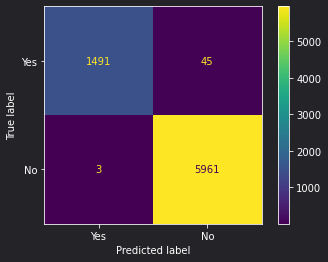

In [398]:
# (!) - 43 bad predictions for 'Exited' = `Yes` and 3 for 'No' 
cm = confusion_matrix(y3_train, v3_train_predictions, labels=['Yes', 'No'])

save_cm(cm, 'train_v3')

cm_d = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=['Yes', 'No'])
cm_d.plot()
plt.show()

In [399]:
# (!) - Not as good as expected... o_O
v3_DT.score(X3_train, y3_train)

0.9936

In [400]:
# (!) - Report is quite good
cr = classification_report(y3_train, v3_train_predictions)

file = open('./_outputs/cr_train_v3.txt', 'w')
file.write(cr)
file.close()

print(cr)

              precision    recall  f1-score   support

          No       0.99      1.00      1.00      5964
         Yes       1.00      0.97      0.98      1536

    accuracy                           0.99      7500
   macro avg       1.00      0.99      0.99      7500
weighted avg       0.99      0.99      0.99      7500



Prédictions et résultats sur `X3_test`

In [401]:
# (!) - 495 bad predictions
v3_test_predictions = v3_DT.predict(X3_test)

df = pd.DataFrame({
    'Prédictions': v3_test_predictions,
    'Réponses': y3_test,
    'Egalité': (v3_test_predictions == y3_test)
})

df.loc[df['Egalité'] == False]

,Prédictions,Réponses,Egalité
3954,Yes,No,False
837,Yes,No,False
6568,Yes,No,False
...,...,...,...
8448,No,Yes,False
9567,Yes,No,False
8122,No,Yes,False


Mesures sur `X3_test`

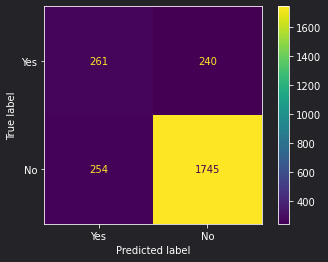

In [402]:
# (!) - Just bad ! 
cm = confusion_matrix(y3_test, v3_test_predictions, labels=['Yes', 'No'])

save_cm(cm, 'test_v3')

cm_d = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=['Yes', 'No'])
cm_d.plot()
plt.show()

In [403]:
# (!) - Very bad
v3_DT.score(X3_test, y3_test)

0.8024

In [404]:
# (!) - Really Bad...
cr = classification_report(y3_test, v3_test_predictions)

file = open('./_outputs/cr_test_v3.txt', 'w')
file.write(cr)
file.close()

print(cr)

              precision    recall  f1-score   support

          No       0.88      0.87      0.88      1999
         Yes       0.51      0.52      0.51       501

    accuracy                           0.80      2500
   macro avg       0.69      0.70      0.69      2500
weighted avg       0.80      0.80      0.80      2500



Aperçu final

In [405]:
# (!) - Awful !!!
# plt.figure(figsize=(48,48))
# plot_tree(v3_DT, feature_names=X3_train.columns, filled=True)
# plt.show()

##### **1.3** - Proto-modélisation `v.4`

Définition et entrainement

In [406]:
# (!) - Predictions as Classifications
v4_DT = DecisionTreeClassifier()
v4_DT.fit(X4_train, y4_train)

DecisionTreeClassifier()

Prédictions et résultats sur `X4_train`

In [407]:
# (!) - 32 bad predictions
v4_train_predictions = v4_DT.predict(X4_train)

df = pd.DataFrame({
    'Prédictions': v4_train_predictions,
    'Réponses': y4_train,
    'Egalité': (v4_train_predictions == y4_train)
})

df.loc[df['Egalité'] == False]

,Prédictions,Réponses,Egalité
6627,No,Yes,False
4911,No,Yes,False
8334,No,Yes,False
...,...,...,...
3263,No,Yes,False
7504,No,Yes,False
6022,No,Yes,False


Mesures sur `X4_train`

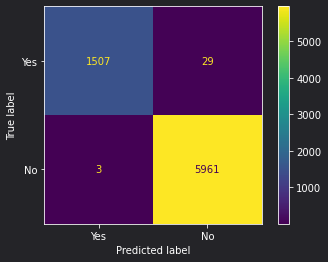

In [408]:
# (!) - 29 bad predictions on 'Exited' = `Yes`, and 3 on 'Exited' = `No`
cm = confusion_matrix(y4_train, v4_train_predictions, labels=['Yes', 'No'])

save_cm(cm, 'train_v4')

cm_d = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=['Yes', 'No'])
cm_d.plot()
plt.show()

In [409]:
# (!) - Better than v3 score
v4_DT.score(X4_train, y4_train)

0.9957333333333334

In [410]:
# (!) - Report is more accurate
cr = classification_report(y4_train, v4_train_predictions)

file = open('./_outputs/cr_train_v4.txt', 'w')
file.write(cr)
file.close()

print(cr)

              precision    recall  f1-score   support

          No       1.00      1.00      1.00      5964
         Yes       1.00      0.98      0.99      1536

    accuracy                           1.00      7500
   macro avg       1.00      0.99      0.99      7500
weighted avg       1.00      1.00      1.00      7500



Prédictions et résultats sur `X4_test`

In [411]:
# (!) - 507 bad predictions
v4_test_predictions = v4_DT.predict(X4_test)

df = pd.DataFrame({
    'Prédictions': v4_test_predictions,
    'Réponses': y4_test,
    'Egalité': (v4_test_predictions == y4_test)
})

df.loc[df['Egalité'] == False]

,Prédictions,Réponses,Egalité
837,Yes,No,False
6568,Yes,No,False
4921,No,Yes,False
...,...,...,...
8448,No,Yes,False
9567,Yes,No,False
8122,No,Yes,False


Mesures sur `X4_test`

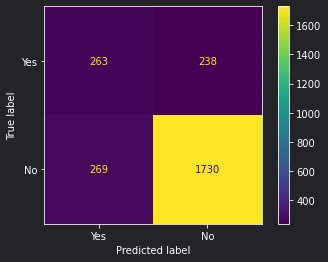

In [412]:
# (!) - More errors on 'Exited' = `Yes`, but less on 'Exited' = `No`
cm = confusion_matrix(y4_test, v4_test_predictions, labels=['Yes', 'No'])

save_cm(cm, 'test_v4')

cm_d = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=['Yes', 'No'])
cm_d.plot()
plt.show()

In [413]:
# (!) - It's sh***y, right !
v4_DT.score(X4_test, y4_test)

0.7972

In [414]:
# (!) - Really Bad...
cr = classification_report(y4_test, v4_test_predictions)

file = open('./_outputs/cr_test_v4.txt', 'w')
file.write(cr)
file.close()

print(cr)

              precision    recall  f1-score   support

          No       0.88      0.87      0.87      1999
         Yes       0.49      0.52      0.51       501

    accuracy                           0.80      2500
   macro avg       0.69      0.70      0.69      2500
weighted avg       0.80      0.80      0.80      2500



##### **1.4** - Comparaisons

In [415]:
version_1 = pd.read_csv('./_outputs/cm_test_v1.csv')
version_1.rename(columns={'Unnamed: 0': 'Test v.1'}, inplace=True)
version_2 = pd.read_csv('./_outputs/cm_test_v3.csv')
version_2.rename(columns={'Unnamed: 0': 'Test v.1'}, inplace=True)

display(
    version_1,
    version_2
)

,Test v.1,Yes,No
0,True Yes,243,252
1,True No,252,1747


,Test v.1,Yes,No
0,True Yes,261,254
1,True No,254,1745


In [416]:
version_3 = pd.read_csv('./_outputs/cm_test_v3.csv')
version_3.rename(columns={'Unnamed: 0': 'Test v.3'}, inplace=True)
version_4 = pd.read_csv('./_outputs/cm_test_v4.csv')
version_4.rename(columns={'Unnamed: 0': 'Test v.4'}, inplace=True)

display(
    version_3,
    version_4
)

,Test v.3,Yes,No
0,True Yes,261,254
1,True No,254,1745


,Test v.4,Yes,No
0,True Yes,263,269
1,True No,269,1730


---

### **2.** Modeling

##### **2.1** - Modèle `_depth` 

Définition

In [417]:
# (!) - 
# m1_DT = DecisionTreeClassifier(max_depth=5)
# m1_DT.fit(X3_train, y3_train)
# m1_predictions = m1_DT.predict(X3_test)

# m1_predictions

Mesures

In [418]:
# (!) - 
# cm = confusion_matrix(y3_test, m1_predictions, labels=['Yes', 'No'])

# cm_d = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=['Yes', 'No'])
# cm_d.plot()
# plt.show()

In [419]:
# (!) - 
# m1_DT.score(X3_test, y3_test)

In [420]:
# (!) - 
# cr = classification_report(y3_test, m1_predictions)

# print(cr)

Cross Validation `KFold`

In [421]:
# cv_KF = KFold(n_splits=5, shuffle=True, random_state=5)
# cv_score = cross_val_score(m1_DT, X3_train, y3_train, cv=cv_KF)

# cv_score

In [422]:
# m1_DT_vs = cv_score.mean()
# m1_DT_vs

In [423]:
# m1_DT.score(X3_train, y3_train)

Cross Validation `GridSearchCV`

In [424]:
# (!) - Grid param' to test : 'max_depth' ? 'criterion' ?
# gd_param ={'max_depth': np.arange(1,25), 'criterion' : ['entropy', 'gini']}

# m1_gd_DT = GridSearchCV(DecisionTreeClassifier(), gd_param, cv=cv_KF)

# m1_gd_DT.fit(X3_train, y3_train)

In [425]:
# (!) - 
# display(
#     m1_gd_DT.best_params_,    
#     m1_gd_DT.best_estimator_,
#     m1_gd_DT.best_score_    
# )

In [426]:
# (!) - 
# m1_DT_best = m1_gd_DT.best_estimator_

# display(
#     m1_DT_best.score(X3_train, y3_train),
#     m1_DT_best.score(X3_test, y3_test)
# )

##### **2.2** - Modèle 2 `RandomForestClassifier`

##### **2.3** - Modèle 3 `KNeighborsClassifier`